In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-13 15:39:02,942 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 15:39:02,943 - settings - Setting database.user to celiib
INFO - 2021-01-13 15:39:02,943 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 15:39:02,948 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-13 15:39:02,948 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-13 15:39:02,960 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-13 15:39:03,223 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-13 15:39:03,295 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 15:39:03,296 - settings - Setting database.user to celiib
INFO - 2021-01-13 15:39:03,299 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 15:39:03,300 - settings - Setting enable_python_native_blobs to True


Sleeping 186 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-13 15:39:03,605 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 2669


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,0,1,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7813492.355591639,3676864.0708675147,27015.716,77.107,77.107,491.082,454.082,2129,0.0002724773895089825,11.508108108108107,3947980.024,70,0.0005392631135562199,30.414,217783493374.38446,59995177.73949442,27872.746713386125,55163.271356609184,3111192762.4912066,1455.6467
864691135012905110,0,0.25,29.00,0,0,1,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9668645.374834057,3910789.1103980723,24484.065,87.846,87.846,377.57,360.525,2129,0.0002201963064589635,8.48207171314741,5024192.766,95,0.0004237496647038483,22.411,387684463243.85925,100390791.9785207,40097.08167112429,77163.53279026621,4080889086.777466,1999.7675
864691135065018692,0,0.25,29.00,0,0,1,=BLOB=,927599,1896021,0,3,3,1,2,19,275,62,10132292.236507235,2065737.434988684,17292.299,110.528,110.528,545.626,544.758,2022,0.00019955997643994288,7.352727272727273,5469042.445,122,0.0003697173719777192,16.574,270764755455.50858,71119038.51464462,26722.95164167566,49508.62206290823,2219383241.438595,3221.0944
864691135065024068,0,0.25,29.00,0,0,1,=BLOB=,1683573,3378174,0,2,2,0,1,11,341,101,15436156.56531248,4728701.448726788,29394.698,311.757,282.738,609.362,594.189,4971,0.00032203612207268187,14.577712609970675,12419519.814,240,0.00040025702075827455,20.712,539357389298.1111,63617255.66268921,34941.17120515178,43428.199912376345,2247322455.4087963,6815.4656
864691135065033540,0,0.25,29.00,0,0,1,=BLOB=,788810,1618020,0,2,2,1,2,7,202,142,7316260.375838028,4091724.4008084666,21512.089,103.41,103.41,416.992,381.352,2199,0.0003005633871727972,10.886138613861386,3494175.925,84,0.0006293329377798859,26.179,450362108267.2257,122117801.5433146,61556.3259277305,128889.36273786092,5361453669.847925,1706.8981
864691135210051520,0,0.25,29.00,0,0,1,=BLOB=,498916,1023655,0,1,1,0,1,13,162,65,6094179.568630371,2578115.586153359,19166.911,95.1

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,008c4d22e8e4c9b8eea4676f09706640,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,26948,35067,2021-01-13 03:34:10
__neuron_split_suggestions,1e759e336b7fd0f8b6b150213aba454d,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8744,35479,2021-01-13 09:35:01
__neuron_split_suggestions,3231c2b8558606a7b2429fedd34acd41,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8681,35478,2021-01-13 09:34:54
__neuron_split_suggestions,93f5439bd0f5692e8798f042bccb377c,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8870,35481,2021-01-13 09:35:14
__neuron_split_suggestions,cf76ecc550e61cc897579e751eedf8c1,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,10537,35484,2021-01-13 09:38:21
__neuron_split_suggestions,e9cc3e87e657666495518ed6b4272501,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8807,35480,2021-01-13 09:35:08


INFO - 2021-01-13 15:39:03,809 - autopopulate - Found 55 keys to populate


Populate Started


INFO - 2021-01-13 15:39:03,832 - connection - Transaction started
INFO - 2021-01-13 15:39:03,835 - autopopulate - Populating: {'segment_id': 864691135589917707, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}




----- Working on Neuron 864691135589917707-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[ 60  85]
 [ 60  91]
 [ 60  97]
 [ 60 103]
 [ 60 108]
 [ 60 137]
 [ 85  91]
 [ 85  97]
 [ 85 103]
 [ 85 108]
 [ 85 137]
 [ 91  97]
 [ 91 103]
 [ 91 108]
 [ 91 137]
 [ 97 103]
 [ 97 108]
 [ 97 137]
 [103 108]
 [103 137]
 [108 137]]


---- working on disconnecting 60 and 85
---- This disconnects S0_2 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [60, 58, 40, 39, 68, 81, 94, 102, 87, 85]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 11  13  36  39  40  49  58  66  68  72  73  80  81  87  93  94 102 103
 157]
Short segments to 

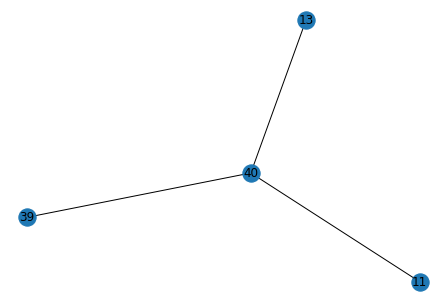

match_branches = [[11, 39], [13, 40]]
edges_to_delete (resolve crossover) = [[11, 13], [11, 40], [13, 39], [39, 40]]
edges_to_create (resolve crossover) = [[11, 39], [13, 40]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 85 because skeletal distance was 1549.6879710233952 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[11, 13], [11, 40], [13, 39], [39, 40]]
edges_to_create = [[11, 39], [13, 40]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 6, 7, 9, 10, 11, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 29, 32, 34, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 

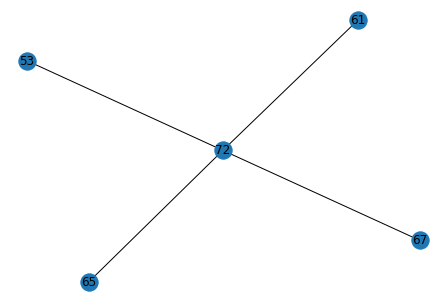

match_branches = [[53, 72], [65, 67]]
edges_to_delete (resolve crossover) = [[53, 61], [53, 65], [53, 67], [61, 65], [61, 67], [61, 72], [65, 72], [67, 72]]
edges_to_create (resolve crossover) = [[53, 72], [65, 67]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 40], [13, 39], [39, 40]]
Skipping endnode 85 because skeletal distance was 1549.6879710233952 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[53, 61], [53, 65], [53, 67], [61, 65], [61, 67], [61, 72], [65, 72], [67, 72]]
edges_to_create = [[53, 72], [65, 67]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 6, 7, 9, 10, 11, 14, 15, 16, 17, 19, 20, 22, 23, 25, 27, 28, 29, 32, 34, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 106, 107, 108, 110, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 1

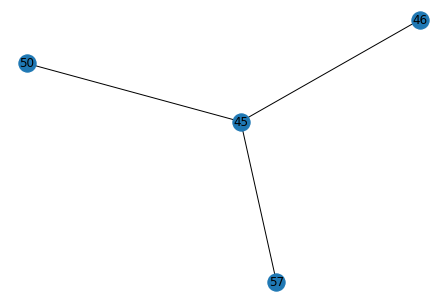

match_branches = [[45, 50], [46, 57]]
edges_to_delete (resolve crossover) = [[45, 46], [45, 57], [46, 50], [50, 57]]
edges_to_create (resolve crossover) = [[45, 50], [46, 57]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 40], [13, 39], [39, 40], [53, 61], [53, 65], [53, 67], [61, 65], [61, 67], [61, 72], [65, 72], [67, 72]]
Skipping endnode 85 because skeletal distance was 1549.6879710233952 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[45, 46], [45, 57], [46, 50], [50, 57]]
edges_to_create = [[45, 50], [46, 57]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 6, 7, 9, 10, 11, 14, 15, 16, 17, 19, 20, 22, 23, 25, 27, 28, 29, 32, 34, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 59, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 106, 107, 108, 110, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 

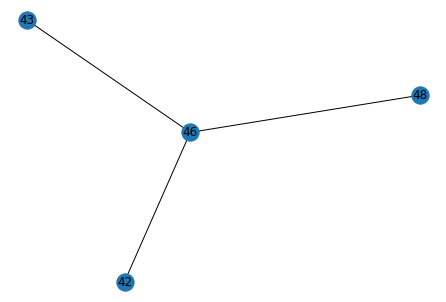

match_branches = [[43, 48]]
edges_to_delete (resolve crossover) = [[42, 43], [42, 46], [42, 48], [43, 46], [46, 48]]
edges_to_create (resolve crossover) = [[43, 48]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 40], [13, 39], [39, 40], [53, 61], [53, 65], [53, 67], [61, 65], [61, 67], [61, 72], [65, 72], [67, 72], [45, 46], [45, 57], [46, 50], [50, 57]]
Skipping endnode 85 because skeletal distance was 1549.6879710233952 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[42, 43], [42, 46], [42, 48], [43, 46], [46, 48]]
edges_to_create = [[43, 48]]
Number of connected components = 9
Comp 0 = {0, 129, 128, 131, 132, 133, 6, 7, 136, 138, 140, 141, 14, 142, 16, 145, 17, 19, 23, 154, 155, 28, 156, 158, 34, 41, 46, 57, 59, 76, 86, 88, 89, 97, 104, 107, 113, 114, 115, 116, 117, 121, 124, 126, 127}
Comp 1 = {1, 2, 134, 135, 137, 10, 11, 139, 9, 144, 146, 147, 20, 149, 22, 150, 152, 151, 27, 29, 157, 32, 37, 38, 39, 43, 44, 45, 47, 48, 50, 52, 53, 54, 55, 56, 63, 64, 

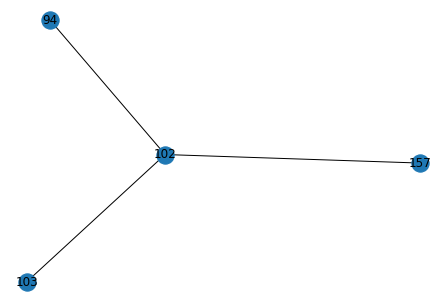

match_branches = [[94, 102]]
edges_to_delete (resolve crossover) = [[94, 103], [94, 157], [102, 103], [102, 157], [103, 157]]
edges_to_create (resolve crossover) = [[94, 102]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 40], [13, 39], [39, 40], [53, 61], [53, 65], [53, 67], [61, 65], [61, 67], [61, 72], [65, 72], [67, 72], [45, 46], [45, 57], [46, 50], [50, 57], [42, 43], [42, 46], [42, 48], [43, 46], [46, 48]]
Skipping endnode 85 because skeletal distance was 1549.6879710233952 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[94, 103], [94, 157], [102, 103], [102, 157], [103, 157]]
edges_to_create = [[94, 102]]
Number of connected components = 11
Comp 0 = {0, 129, 128, 131, 132, 133, 6, 7, 136, 138, 140, 141, 14, 142, 16, 145, 17, 19, 23, 154, 155, 28, 156, 158, 34, 41, 46, 57, 59, 76, 86, 88, 89, 97, 104, 107, 113, 114, 115, 116, 117, 121, 124, 126, 127}
Comp 1 = {1, 2, 134, 135, 137, 10, 11, 139, 9, 144, 146, 147, 20, 149, 22, 150, 152, 151, 27, 29, 32,

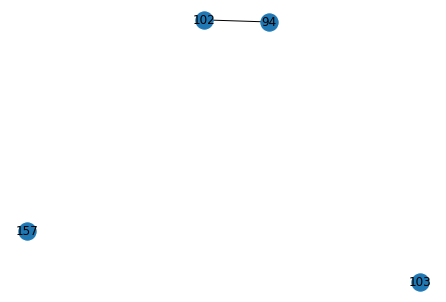

match_branches = [[94, 102]]
edges_to_delete (resolve crossover) = [[94, 103], [94, 157], [102, 103], [102, 157], [103, 157]]
edges_to_create (resolve crossover) = [[94, 102]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 40], [13, 39], [39, 40], [53, 61], [53, 65], [53, 67], [61, 65], [61, 67], [61, 72], [65, 72], [67, 72], [45, 46], [45, 57], [46, 50], [50, 57], [42, 43], [42, 46], [42, 48], [43, 46], [46, 48], [94, 103], [94, 157], [102, 103], [102, 157], [103, 157]]
Skipping endnode 85 because skeletal distance was 1549.6879710233952 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[94, 103], [94, 157], [102, 103], [102, 157], [103, 157]]
edges_to_create = [[94, 102]]
Number of connected components = 11
Comp 0 = {0, 129, 128, 131, 132, 133, 6, 7, 136, 138, 140, 141, 14, 142, 16, 145, 17, 19, 23, 154, 155, 28, 156, 158, 34, 41, 46, 57, 59, 76, 86, 88, 89, 97, 104, 107, 113, 114, 115, 116, 117, 121, 124, 126, 127}
Comp 1 = {1, 2, 134, 135, 137, 10, 11, 139,

  Edge: [ 87 102]: curr_angle = 56.71
  Edge: [102  94]: curr_angle = 39.42
  Edge: [94 81]: curr_angle = 13.14
  Edge: [81 68]: curr_angle = 22.76
  Edge: [68 66]: curr_angle = 59.49
  Edge: [66 70]: curr_angle = 41.01
  Edge: [ 70 106]: curr_angle = 26.21
  Edge: [106 108]: curr_angle = 23.66

Total time for doubling_back = 0.42708921432495117

Attempting the width jump check (attempting from both sides)
  Edge: [ 87 102]: jump = 1581.69
Adding error edge [ 87 102] because width jump was 1581.6899767198056
  Edge: [102  94]: jump = -1186.89
  Edge: [94 81]: jump = -545.77
  Edge: [81 68]: jump = -412.89
  Edge: [68 66]: jump = 91.57
  Edge: [66 70]: jump = 130.66
  Edge: [ 70 106]: jump = 183.18
  Edge: [106 108]: jump = 174.9
Total time for width = 0.2544891834259033
Path starting at 85 had err_edges: [[87, 102]]
  Edge: [108 106]: jump = -174.9
  Edge: [106  70]: jump = -183.18
  Edge: [70 66]: jump = -130.66
  Edge: [66 68]: jump = -91.57
  Edge: [68 81]: jump = 412.89
Adding erro

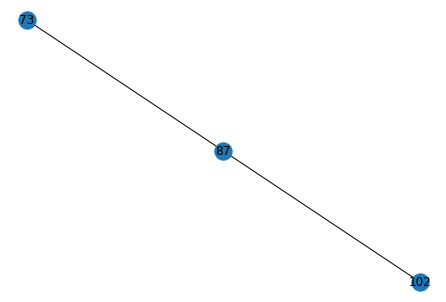

match_branches = [[73, 87]]
edges_to_delete (resolve crossover) = [[73, 102], [87, 102]]
edges_to_create (resolve crossover) = [[73, 87]]
edges_to_delete (cut_limb_network) = [array([ 73, 102]), array([ 87, 102])]
edges_to_create = [[73, 87]]
Number of connected components = 12
Comp 0 = {0, 129, 128, 131, 132, 133, 6, 7, 136, 138, 140, 141, 14, 142, 16, 145, 17, 19, 23, 154, 155, 28, 156, 158, 34, 41, 46, 57, 59, 76, 86, 88, 89, 97, 104, 107, 113, 114, 115, 116, 117, 121, 124, 126, 127}
Comp 1 = {1, 2, 10, 149, 22, 150, 29, 37, 38, 43, 45, 47, 48, 50, 52, 53, 54, 56, 63, 64, 65, 67, 72, 73, 83, 85, 87, 92}
Comp 2 = {25, 42, 15}
Comp 3 = {98, 130, 101, 69, 105, 109, 111, 112, 143, 148, 21, 119, 91, 61}
Comp 4 = {134, 135, 137, 9, 11, 139, 144, 146, 147, 20, 151, 152, 27, 32, 39, 44, 55, 66, 68, 70, 71, 75, 77, 78, 79, 80, 81, 82, 84, 90, 93, 94, 95, 96, 99, 100, 102, 106, 108, 110, 118, 120, 122, 123, 125}
Comp 5 = {103}
Comp 6 = {157}
Comp 7 = {33, 35, 36, 5, 26, 3, 40, 8, 4, 12, 13, 4

  Edge: [108 106]: curr_angle = 24.9
  Edge: [106  70]: curr_angle = 26.21
  Edge: [70 66]: curr_angle = 41.01
  Edge: [66 68]: curr_angle = 59.49
  Edge: [68 81]: curr_angle = 22.76
  Edge: [81 80]: curr_angle = 23.24
  Edge: [80 79]: curr_angle = 26.5
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [79 78]: curr_angle = 3.22
  Edge: [ 78 125]: curr_angle = 10.82
  Edge: [125 135]: curr_angle = 17.96
  Edge: [135 134]: curr_angle = 32.0

Total time for doubling_back = 2.002854824066162

Attempting the width jump check (attempting from both sides)
  Edge: [108 106]: jump = -174.9
  Edge: [106  70]: jump = -183.18
  Edge: [70 66]: jump = -130.66
  Edge: [66 68]: jump = -91.57
  Edge: [68 81]: jump = 412.89
Adding error edge [68 81] because width jump was 412.89393857351496
  Edge: [81 80]: jump = -200.95
  Edge: [80 79]: jump = -15.27
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [79 78]: jump = -8

  Edge: [3 2]: curr_angle = 13.39
  Edge: [2 1]: curr_angle = 157.79
  Edge: [1 5]: curr_angle = 55.72

Total time for doubling_back = 0.1858072280883789
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 1] had a doubling back of 157.79433083342465
***inside resolve crossover!!!!****
coordinate_branches = [0, 1, 2]
0 = red
1 = aqua
2 = purple
Angle between 0 and 1 = 11.33 
Angle between 0 and 2 = 55.93 
Angle between 1 and 2 = 129.97 
Final Matches = [[0, 1]]
matched_branches_revised = [[0, 1]]
Original graph


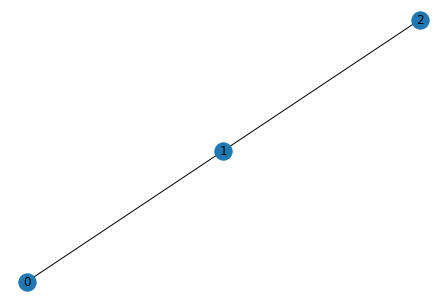

match_branches = [[0, 1]]
edges_to_delete (resolve crossover) = [[0, 2], [1, 2]]
edges_to_create (resolve crossover) = [[0, 1]]
edges_to_delete (cut_limb_network) = [array([0, 2]), array([1, 2])]
edges_to_create = [[0, 1]]
Number of connected components = 2
Comp 0 = {2, 3, 4}
Comp 1 = {0, 1, 5, 6}
curr_limb_copy.deleted_edges = [array([0, 2]), array([1, 2])]
curr_limb_copy.created_edges = [[0, 1]]
After get best cut: cut_edges = [array([0, 2]), array([1, 2])], added_edges = [[0, 1]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([2, 3, 4]), array([0, 1, 5, 6])]


 ------ Total time for Splitting 864691135274155493 = 306.0258264541626 ------


----- Working on Neuron 864691135345274271-------
Decompressing Neur

In [ ]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")